# NUMBER OF RELAX IN USPEX

In [6]:
import os
from template_csp.manageuspex import best_structures, read_individuals

test_elements = ['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']
total = []
number_fo_pairs = [105,210,210,210,210]
complist = [1,2,3,4,6]
for comp in complist:
    total.append(0)
    for individuals_file in os.listdir(f'TEMPLATES/SETUP_COMP{comp}/all_Individuals/'):
        with open(f'TEMPLATES/SETUP_COMP{comp}/all_Individuals/{individuals_file}', 'r') as f:
            lines = f.readlines()
        last_line = lines[-1]
        total[complist.index(comp)] += int(last_line.split()[1])
print('-------------------------------------')
print(f'Total number of structures seen by uspex for each composition: {", ".join([str(total[i]) for i in range(len(total))])}')
print(f'Average number of structures seen by uspex for each composition: {", ".join([str(total[i]/number_fo_pairs[i]) for i in range(len(total))])}')
print(f'Total number of structures seen by uspex for all compositions: {sum(total)}')
print(f'Average number of structures seen by uspex for all compositions: {sum(total)/sum(number_fo_pairs):.2f}')
print('-------------------------------------')

temp_init = [20,45,30,30,20] 
temp_final = [10,20,15,15,10]
ea_searches_alltemp = [25,60,40,40,30]
ea_searches_onetemp = [35,70,50,50,40]

relax_with_temp = [(temp_init[i]*40 + temp_final[i]*number_fo_pairs[i]-40 + total[i]/number_fo_pairs[i]*ea_searches_alltemp[i]) for i in range(len(temp_init))]

print('-------------------------------------')
print(f'Number of relaxations taking all temp possible with average error 0.1: {", ".join([str(temp_init[i]*40 + temp_final[i]*160 + total[i]/number_fo_pairs[i]*ea_searches_alltemp[i]) for i in range(len(temp_init))])}')
print(f'Number of relaxations taking one temp possible with average error 0.1: {", ".join([str(temp_init[i]*40 + temp_final[i]*160 + total[i]/number_fo_pairs[i]*ea_searches_onetemp[i]) for i in range(len(temp_init))])}')

print(f'Improvement w.r.t uspex: {sum(total)/sum(relax_with_temp):.2f}')

-------------------------------------
Total number of structures seen by uspex for each composition: 22412, 46300, 47555, 48626, 57161
Average number of structures seen by uspex for each composition: 213.44761904761904, 220.47619047619048, 226.45238095238096, 231.55238095238096, 272.1952380952381
Total number of structures seen by uspex for all compositions: 222054
Average number of structures seen by uspex for all compositions: 234.98
-------------------------------------
-------------------------------------
Number of relaxations taking all temp possible with average error 0.1: 7736.190476190476, 18228.571428571428, 12658.095238095239, 12862.095238095239, 10565.857142857143
Number of relaxations taking one temp possible with average error 0.1: 9870.666666666666, 20433.333333333336, 14922.619047619048, 15177.619047619048, 13287.809523809523
Improvement w.r.t uspex: 3.45


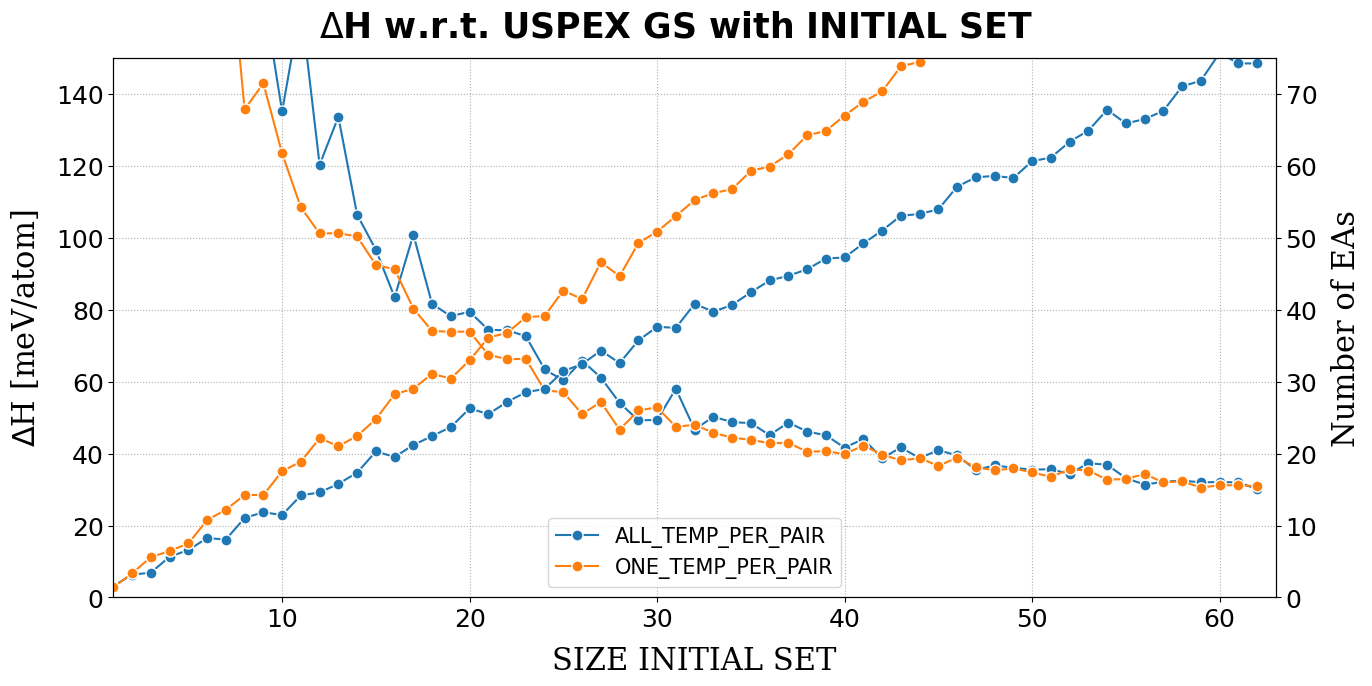

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mother_dir = './CONFRONTO_METODI/'

title = r'$\Delta$H w.r.t. USPEX GS with INITIAL SET'
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=25, y=0.95, fontweight='bold')
max_x_ticks = np.array([])
ax2 = ax.twinx()

complist = ['ALL_TEMP_PER_PAIR', 'ONE_TEMP_PER_PAIR']
for comp in complist:
    dir_name = f'{comp}'
    df_tot = pd.read_csv(mother_dir + f'{dir_name}/TotalStaticsBefore.csv', header=None, na_filter=False, index_col = 0)
    tot = (df_tot.to_numpy()).T * 1000

    x = np.arange(1, len(tot[0])+1) 

    ax.plot(x, tot[0] , marker = 'o', markeredgecolor='white', markersize=8, label=f'{comp}')


    df_tot = pd.read_csv(mother_dir + f'{dir_name}/NumberSearches.csv', header=None, na_filter=False, index_col = 0)
    tot = (df_tot.to_numpy()).T 

    x = np.arange(1, len(tot[0])+1) 

    ax2.plot(x, tot[0] , marker = 'o', markeredgecolor='white', markersize=8, label=f'{comp}')

    max_x_ticks = np.append(max_x_ticks, len(tot[0]))


ax.set_ylabel(r'$\Delta$H [meV/atom]', fontsize=22, labelpad=10, family='serif')
step = 20
y_ticks  = np.arange(0,150,step, dtype=float)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'{i:.0f}' for i in y_ticks], fontsize=18)
ax.set_ylim(0,150)

y_ticks  = np.arange(0,75, 10, dtype=float)
ax2.set_yticks(y_ticks)
ax2.set_yticklabels([f'{i:.0f}' for i in y_ticks], fontsize=18)
ax2.set_ylim(0,75)
ax2.set_ylabel('Number of EAs', fontsize=22, labelpad=10, family='serif')

ax.set_xlabel('SIZE INITIAL SET', fontsize=22, labelpad=10, family='serif')
xticks = np.arange(0, max(max_x_ticks)+1, 10)
ax.set_xticks(xticks)
ax.set_xlim(1,max(max_x_ticks)+1)
ax.set_xticklabels([f'{i:.0f}' for i in xticks], fontsize=18)

ax.grid(True, ls=':')
ax.legend(loc='lower center', fontsize=15)

plt.show()
#fig.savefig('FIG/INIT_H.png', bbox_inches="tight")
